# Exploratory Data Analysis (EDA) of Brain Stroke Dataset. 
## The objective of this EDA is to understand the data distribution, identify potential relationships between Age and stroke variables, hypertension and heart disease variables and uncover insights that can inform further analysis.

In [4]:
#Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew # Skewness
from ydata_profiling import ProfileReport
%matplotlib inline

# #ML Library
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("brain_stroke.csv")  # first read the data file 

In [6]:
df.head() # # quick look to dataset . show  first 5 data row as default 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
df.tail()  #  show last five data row as default . 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [8]:
df.shape #  show total rows and columns present in the dataset. 

(4981, 11)

### We have 4981 rows of data and 11 columns 4981*11 = 54791 no of data points(cells).

In [9]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
df.info()   #the complete information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## Data type -  3 interger ,5 objeect/string, 3 float 
## We have 11 columns.
## 5 are catagories data(object), So when creating the correaltion or anything we need to    change it to machine understable i.e 1 and 0( it is called encoding).

In [11]:
print(df.isnull().values.sum()) 


0


In [12]:
df['gender'].value_counts()

gender
Female    2907
Male      2074
Name: count, dtype: int64

In [13]:
# Replace the ' 's with NaN
df = df.replace(" ",np.NaN)

In [14]:
# Count the number of NaNs in the dataset to verify
print(df.isnull().values.sum())

0


# EDA 

In [15]:
df.describe() #it prints summary statistics.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [16]:
profile = ProfileReport(df,title="train.csv")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

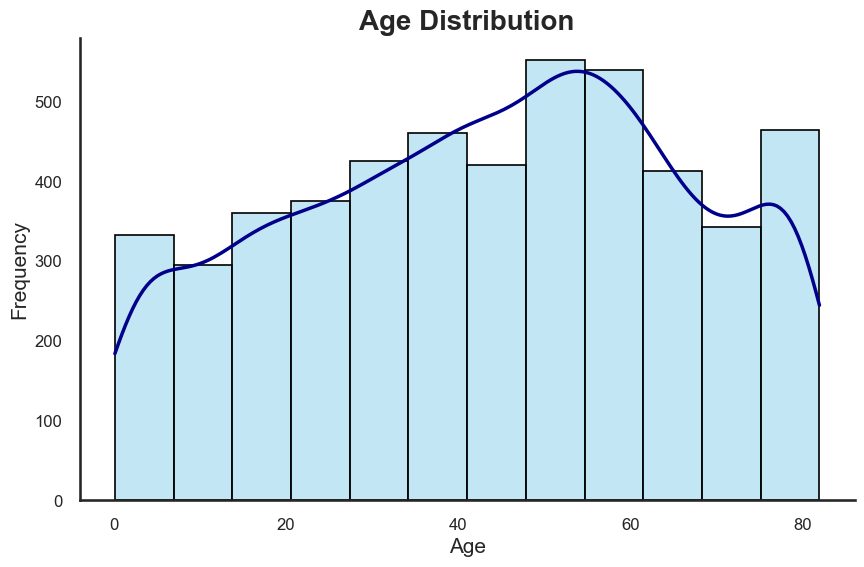

In [17]:
# Set the style and context for a minimal look
sns.set(style="white", context="talk")

# Create the histogram plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="age", kde=True, color='skyblue', edgecolor='black', linewidth=1.2, bins=12)

# Add a title and labels with a larger font size for better readability
ax.set_title('Age Distribution', fontsize=20, weight='bold')
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

# Customize the appearance of the KDE line
for line in ax.lines:
    line.set_color('darkblue')
    line.set_linewidth(2.5)

# Remove grid lines
ax.grid(False)

# Customize the tick parameters
ax.tick_params(axis='both', which='major', labelsize=12)

# Remove the top and right spines for a minimal look
sns.despine()

# Show the plot
plt.show()

### The data may not be perfectly normally distributed, but the left skew is minor.
### Symmetry: The distribution appears to be slightly skewed to the left. In a perfectly normal distribution, the curve would be perfectly symmetrical.
### Outliers: There are a few data points in the tails of the distribution that extend beyond.

In [14]:
# Calculate skewness
skewness = skew(df["age"])

# Print the skewness value
print("Skewness:", skewness)

Skewness: -0.14395782687169578


## A skewness of -0.14 indicates a slight left skew.  In other words, the tail of the distribution extends slightly to the left.

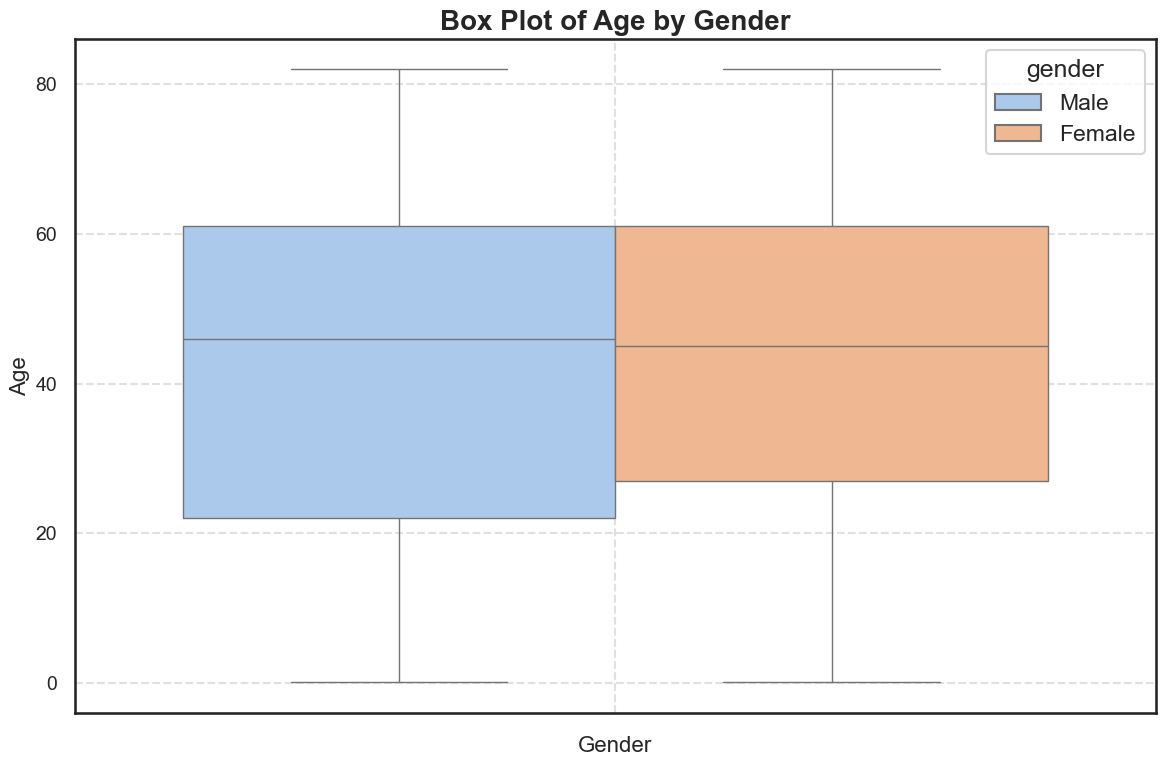

In [18]:
# Crete Box Plot of Age
# use this https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize=(12, 8))  # Adjusting the figure size
box_plot = sns.boxplot(y='age', hue= 'gender', data=df, palette="pastel")

# Customizing the plot
box_plot.set_title("Box Plot of Age by Gender", fontsize=20, weight='bold')
box_plot.set_xlabel("Gender", fontsize=16)
box_plot.set_ylabel("Age", fontsize=16)
box_plot.tick_params(labelsize=14)  # Adjusting tick label size
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Displaying the plot
plt.show()


## Overall, the age distribution seems similar between genders, but males exhibit more variability.
## The median age for males (blue box plot) appears slightly higher than for females (orange box plot).
## The IQR(interquartile range) for males is wider, suggesting greater variability in age.

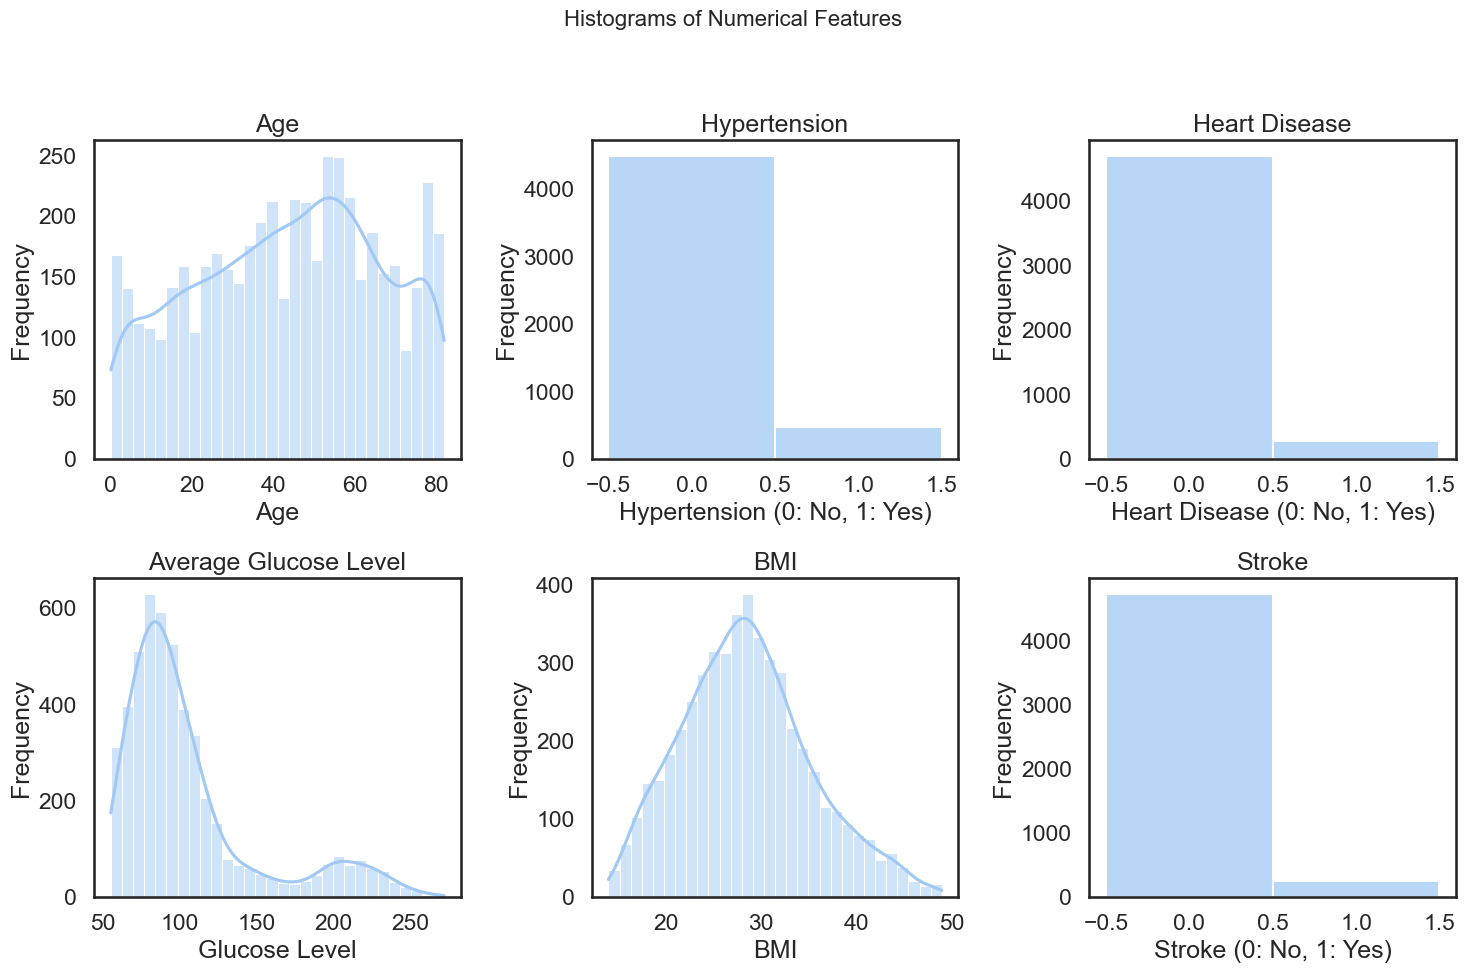

In [19]:
# Histograms for numerical features
import matplotlib.pyplot as plt
sns.set_palette("pastel")

# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Histograms of Numerical Features", fontsize=16)

# Age
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Frequency")

# Hypertension
sns.histplot(df['hypertension'], bins=2, discrete=True, ax=axes[0, 1])
axes[0, 1].set_title("Hypertension")
axes[0, 1].set_xlabel("Hypertension (0: No, 1: Yes)")
axes[0, 1].set_ylabel("Frequency")

# Heart Disease
sns.histplot(df['heart_disease'], bins=2, discrete=True, ax=axes[0, 2])
axes[0, 2].set_title("Heart Disease")
axes[0, 2].set_xlabel("Heart Disease (0: No, 1: Yes)")
axes[0, 2].set_ylabel("Frequency")

# Average Glucose Level
sns.histplot(df['avg_glucose_level'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Average Glucose Level")
axes[1, 0].set_xlabel("Glucose Level")
axes[1, 0].set_ylabel("Frequency")

# BMI
sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("BMI")
axes[1, 1].set_xlabel("BMI")
axes[1, 1].set_ylabel("Frequency")

# Stroke
sns.histplot(df['stroke'], bins=2, discrete=True, ax=axes[1, 2])
axes[1, 2].set_title("Stroke")
axes[1, 2].set_xlabel("Stroke (0: No, 1: Yes)")
axes[1, 2].set_ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


## The graph presents histograms of several numerical features related to health, including Age, Hypertension, Heart Disease, Average Glucose Level, BMI, and Stroke.
## The age distribution is left-skewed, indicating a larger proportion of individuals are between 40 and 60 years old.
## Both Hypertension and Heart Disease are imbalanced, with a significantly higher number of individuals without these conditions compared to those with.
## The glucose level distribution is right-skewed, suggesting that a majority of individuals have lower glucose levels.
## The BMI distribution is approximately normal, with a peak around the healthy weight range.There are individuals with both underweight and overweight conditions.
## Similar to Hypertension and Heart Disease, Stroke is imbalanced with a significantly lower number of individuals who have experienced a stroke.

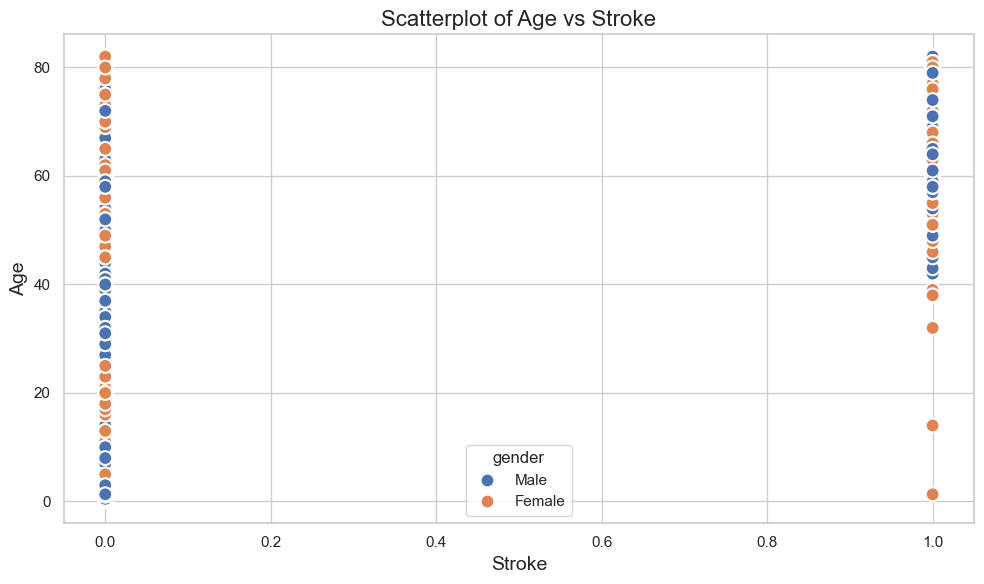

In [20]:
# Draw Scatterplot of stroke and age
# Assuming 'df' is your DataFrame and it is already loaded
sns.set(style="whitegrid")  # Setting the theme

# Creating the scatterplot
plt.figure(figsize=(10, 6))  # Adjusting the figure size
scatter = sns.scatterplot(data=df, y="age", x="stroke", hue='gender', s=100, color="green", edgecolor="w", linewidth=1.5)

# Customizing the plot
scatter.set_title("Scatterplot of Age vs Stroke", fontsize=16)  # Changed the title
scatter.set_xlabel("Stroke", fontsize=14)  # Changed the x-axis label
scatter.set_ylabel("Age", fontsize=14)  # Changed the y-axis label
plt.tight_layout()

# Displaying the plot
plt.show()

## The data points are clustered into two groups based on the "gender" variable.
## The "gender" variable appears to be a significant factor in this dataset, potentially influencing the presence of stroke.
## Due to the limited data points and the clustering based on gender, it's challenging to observe any clear correlation between age and stroke.

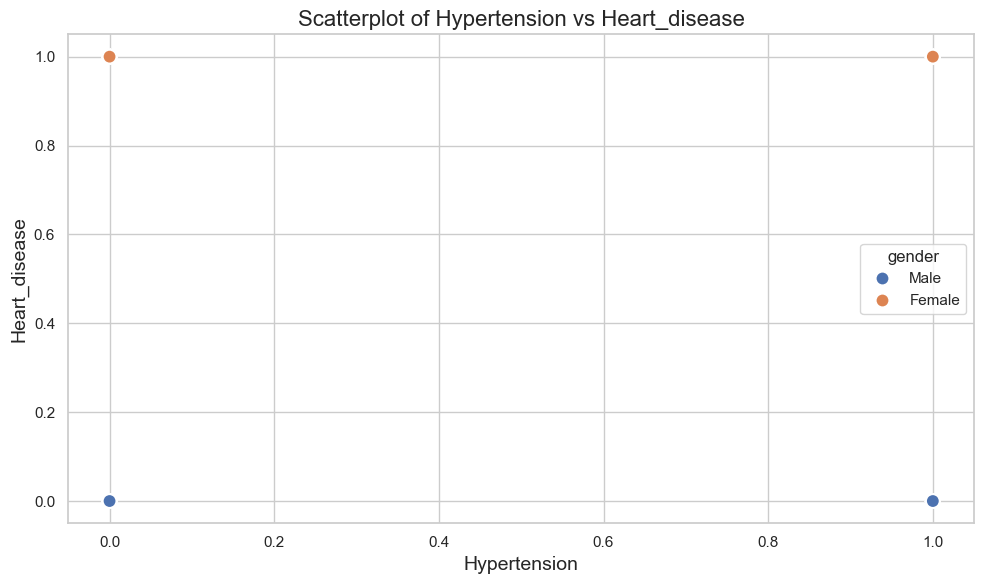

In [21]:
# scatter plot of hypertension and heart_disease 
sns.set(style="whitegrid")  # Setting the theme

# Creating the scatterplot
plt.figure(figsize=(10, 6))  # Adjusting the figure size
scatter = sns.scatterplot(data=df, y="hypertension", x="heart_disease",hue='gender', s=100, color="green", edgecolor="w", linewidth=1.5)

# Customizing the plot
scatter.set_title("Scatterplot of Hypertension vs Heart_disease", fontsize=16)  # Changed the title
scatter.set_xlabel("Hypertension", fontsize=14)  # Changed the x-axis label
scatter.set_ylabel("Heart_disease", fontsize=14)  # Changed the y-axis label
plt.tight_layout()

# Displaying the plot
plt.show()

## No Clear Correlation: Due to the limited data points and the clustering based on gender, it's challenging to observe any clear correlation between hypertension and heart disease.


Encoded Data:
       gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  

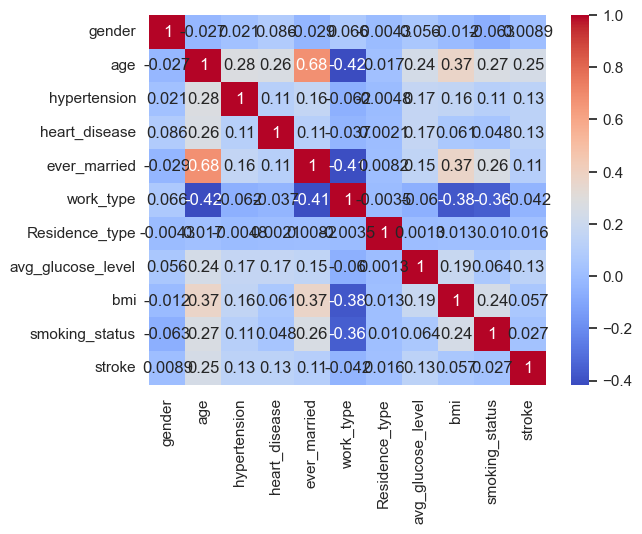

In [22]:
# build correlation
# Select all categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns 
# Encode categorical columns 
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.astype('category').cat.codes) 
# Verify encoding
print("\nEncoded Data:\n", df) 
corr_matrix = df.corr()
# Calculate correlation matrix corr_matrix = df.corr()
 # Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# show graphs
plt.show()

# encode non numerical data into numerical data form . 
# If correlation give error then remeber you need to encode famle to 1 or 0. that can be
# done from one hot encoding uncomment the below code and see

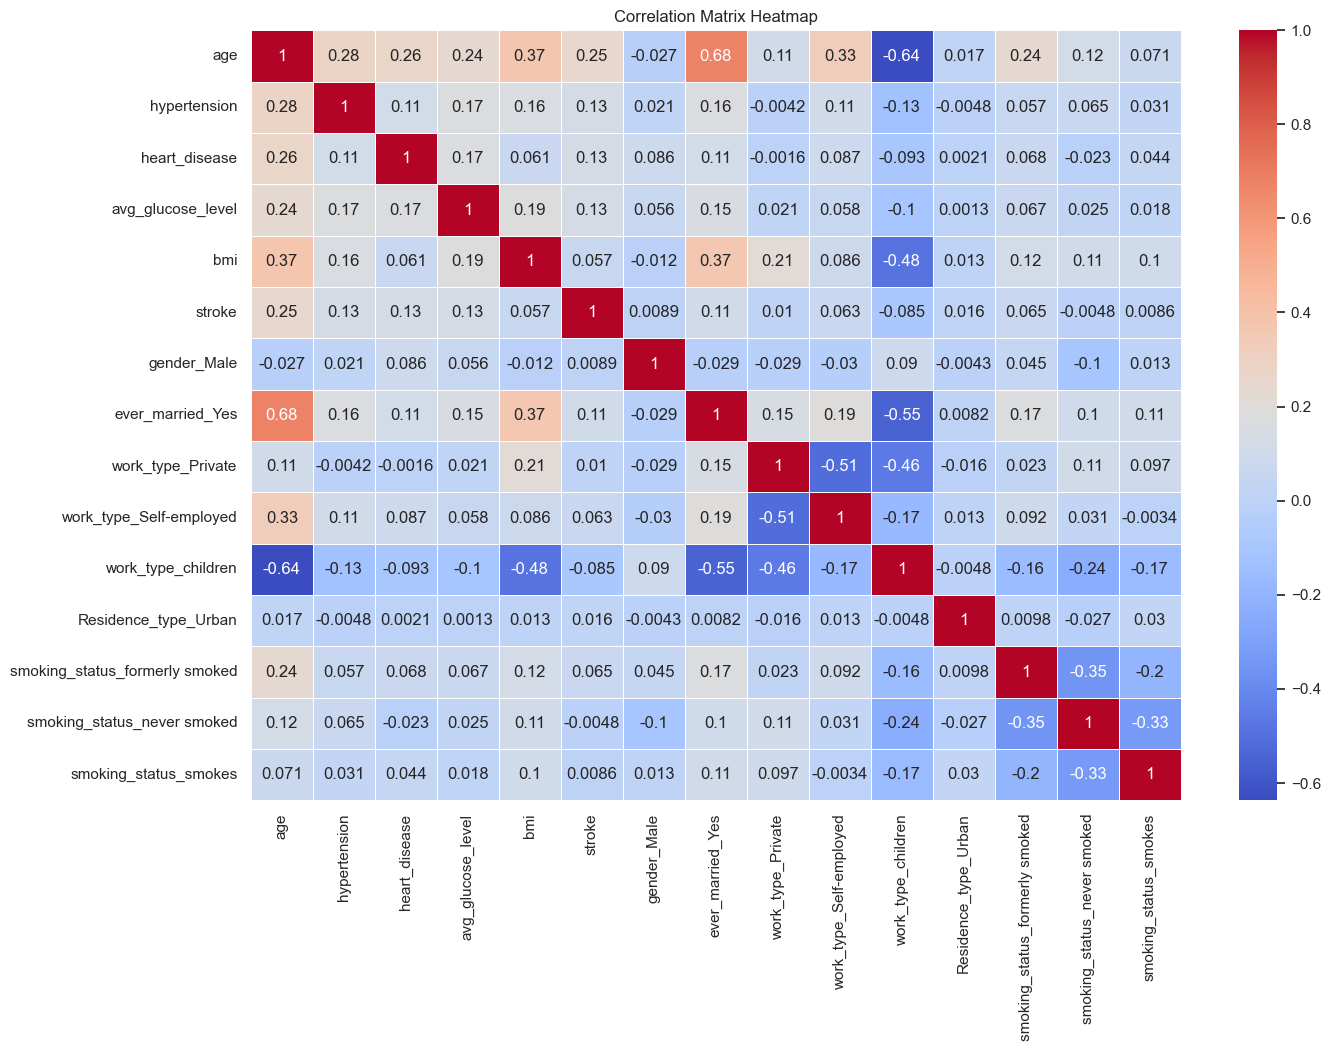

In [23]:

# Heatmap of correlation matrix

# Load the dataset
data = pd.read_csv('brain_stroke.csv')

# One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Correaltion of age with stroke
## The correlation coefficient between age and stroke is 0.25.
## Positive Correlation: The positive value indicates a positive correlation between age and stroke. This means that as age increases, the likelihood of having a stroke also tends to increase.
## Strength of Correlation: The correlation coefficient of 0.25 suggests a moderate positive correlation. It's not a very strong relationship, but it's still significant enough to consider.
# Correlation Between Hypertension and Heart Disease
## The correlation coefficient of 0.11 between hypertension and heart disease indicates a very weak positive relationship between the two conditions.
## The positive value indicates that as hypertension increases, there's a slight tendency for heart disease to increase as well.


# EDA report and insights 
## Age Distribution:
## The majority of individuals are between 40 and 60 years old.
## Age has a moderate positive correlation with stroke, hypertension, and heart disease.
## Health Conditions:
## Both hypertension and heart disease are more common in older individuals.
## The presence of these conditions is imbalanced, with fewer individuals affected compared to those without these conditions.
## Glucose Levels and BMI: Glucose levels are generally lower, with a right-skewed distribution.
## BMI distribution is approximately normal, indicating a balanced representation of underweight, healthy weight, and overweight individuals.
## Stroke Occurrence:
## Stroke occurrence is rare, with a significantly lower number of individuals affected.
## The positive correlation between age and stroke suggests that older individuals are at higher risk of experiencing a stroke.
## Gender Influence: The scatter plot analysis indicates that gender might be a significant factor in the dataset, influencing the presence of stroke.
# Conclusion:
### The exploratory data analysis provides valuable insights into the relationships between age, health conditions, and stroke occurrence. Age is a significant factor, with older individuals being more likely to have hypertension, heart disease, and stroke. The dataset also highlights the imbalance in health conditions and stroke occurrence, indicating the need for targeted health interventions for at-risk groups.
